## Libraries

In [1]:
import pandas as pd

## Data Prep

In [2]:
aq_data = pd.read_csv('AURN_2015_2023_daily.csv',index_col=0)
output_data = pd.read_csv('output_data.csv')

In [3]:
output_data.head()
output_data.columns

Index(['time', 'tavg', 'tmin', 'tmax', 'prcp', 'snow', 'wdir', 'wspd', 'wpgt',
       'pres', 'tsun', 'site_id', 'latitude', 'longitude', 'elevation', 'u',
       'v', 'canyon_factor', 'windward_height_avg', 'leeward_height_avg',
       'road_distance', 'indicatedspeed_kph'],
      dtype='object')

##### Subset Columns interested in

In [4]:
## select columns
aq_no2 = aq_data[['site','code','date','no2']].copy()
## merge with output_data at code and date. 
aq_no2.rename(columns={"code": "site_id", "date": "time"},inplace=True)


data = aq_no2.merge(output_data, on=['time', 'site_id'])

# data.head()

In [5]:
data['date']  = pd.to_datetime(data['time'])
data['month'] = data['date'].dt.month
data['year'] = data['date'].dt.year
data['day'] = data['date'].dt.day
data['jdate'] = pd.DatetimeIndex(data['date']).to_julian_date()
data.head()

,site,site_id,time,no2,tavg,tmin,tmax,prcp,snow,wdir,...,canyon_factor,windward_height_avg,leeward_height_avg,road_distance,indicatedspeed_kph,date,month,year,day,jdate
0,Aberdeen Union Street Roadside,ABD7,2018-01-01,50.275570,2.0,1.5,3.7,0.0,NaN,302.0,...,10.6,8.31875,8.53913,15.215526,32,2018-01-01,1,2018,1,2458119.5
1,Aberdeen Union Street Roadside,ABD7,2018-01-02,42.579688,2.3,0.3,4.7,1.4,NaN,214.0,...,26.6,8.53913,8.31875,15.215526,32,2018-01-02,1,2018,2,2458120.5
2,Aberdeen Union Street Roadside,ABD7,2018-01-03,74.239862,1.7,0.4,5.0,0.4,NaN,327.0,...,8.7,8.31875,8.53913,15.215526,32,2018-01-03,1,2018,3,2458121.5
3,Aberdeen Union Street Roadside,ABD7,2018-01-04,56.537070,1.9,-0.2,3.3,1.2,NaN,17.0,...,5.4,8.31875,8.53913,15.215526,32,2018-01-04,1,2018,4,2458122.5
4,Aberdeen Union Street Roadside,ABD7,2018-01-05,57.666231,1.9,0.6,2.6,7.6,NaN,4.0,...,8.5,8.31875,8.53913,15.215526,32,2018-01-05,1,2018,5,2458123.5


In [6]:

data.head()

,site,site_id,time,no2,tavg,tmin,tmax,prcp,snow,wdir,...,canyon_factor,windward_height_avg,leeward_height_avg,road_distance,indicatedspeed_kph,date,month,year,day,jdate
0,Aberdeen Union Street Roadside,ABD7,2018-01-01,50.275570,2.0,1.5,3.7,0.0,NaN,302.0,...,10.6,8.31875,8.53913,15.215526,32,2018-01-01,1,2018,1,2458119.5
1,Aberdeen Union Street Roadside,ABD7,2018-01-02,42.579688,2.3,0.3,4.7,1.4,NaN,214.0,...,26.6,8.53913,8.31875,15.215526,32,2018-01-02,1,2018,2,2458120.5
2,Aberdeen Union Street Roadside,ABD7,2018-01-03,74.239862,1.7,0.4,5.0,0.4,NaN,327.0,...,8.7,8.31875,8.53913,15.215526,32,2018-01-03,1,2018,3,2458121.5
3,Aberdeen Union Street Roadside,ABD7,2018-01-04,56.537070,1.9,-0.2,3.3,1.2,NaN,17.0,...,5.4,8.31875,8.53913,15.215526,32,2018-01-04,1,2018,4,2458122.5
4,Aberdeen Union Street Roadside,ABD7,2018-01-05,57.666231,1.9,0.6,2.6,7.6,NaN,4.0,...,8.5,8.31875,8.53913,15.215526,32,2018-01-05,1,2018,5,2458123.5


<Axes: xlabel='AURN site', ylabel='Average leeward height (m)'>

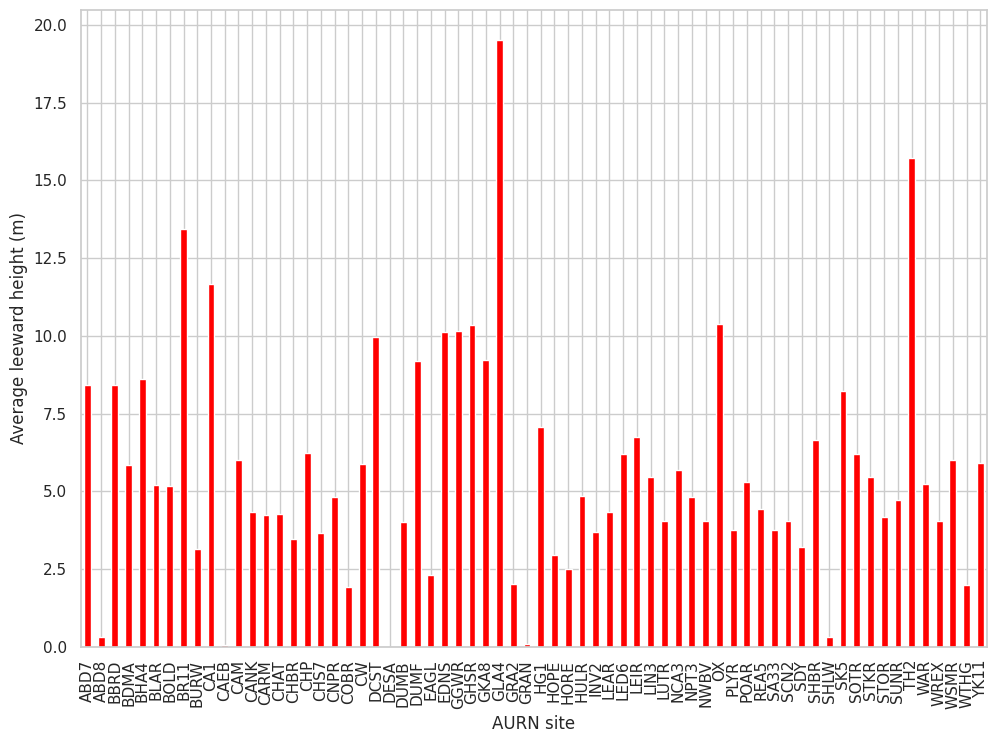

In [29]:
## plot average windward_height_avg grouped by site_id
# data.groupby('site_id')['windward_height_avg'].mean().plot(kind='bar', ylabel='Average windward height (m)', xlabel='AURN site',color='green')
data.groupby('site_id')['leeward_height_avg'].mean().plot(kind='bar', ylabel='Average leeward height (m)', xlabel='AURN site',color='red')

In [7]:
data.dtypes

site                           object
site_id                        object
time                           object
no2                           float64
tavg                          float64
tmin                          float64
tmax                          float64
prcp                          float64
snow                          float64
wdir                          float64
wspd                          float64
wpgt                          float64
pres                          float64
tsun                          float64
latitude                      float64
longitude                     float64
elevation                     float64
u                             float64
v                             float64
canyon_factor                 float64
windward_height_avg           float64
leeward_height_avg            float64
road_distance                 float64
indicatedspeed_kph              int64
date                   datetime64[ns]
month                           int32
year        

In [8]:
selected_columns = data.select_dtypes(include=['float64','int64','int32'])
selected_columns = selected_columns.drop(columns=['snow','tsun'])
selected_columns.head()

,no2,tavg,tmin,tmax,prcp,wdir,wspd,wpgt,pres,latitude,...,v,canyon_factor,windward_height_avg,leeward_height_avg,road_distance,indicatedspeed_kph,month,year,day,jdate
0,50.275570,2.0,1.5,3.7,0.0,302.0,10.6,NaN,988.1,57.144555,...,4.197100,10.6,8.31875,8.53913,15.215526,32,1,2018,1,2458119.5
1,42.579688,2.3,0.3,4.7,1.4,214.0,13.3,NaN,993.3,57.144555,...,4.830553,26.6,8.53913,8.31875,15.215526,32,1,2018,2,2458120.5
2,74.239862,1.7,0.4,5.0,0.4,327.0,8.7,NaN,982.2,57.144555,...,2.357133,8.7,8.31875,8.53913,15.215526,32,1,2018,3,2458121.5
3,56.537070,1.9,-0.2,3.3,1.2,17.0,5.4,NaN,988.8,57.144555,...,-5.191546,5.4,8.31875,8.53913,15.215526,32,1,2018,4,2458122.5
4,57.666231,1.9,0.6,2.6,7.6,4.0,8.5,NaN,994.3,57.144555,...,-6.432821,8.5,8.31875,8.53913,15.215526,32,1,2018,5,2458123.5


In [9]:
## show number of NaN in columns 
selected_columns.isnull().sum()

## fill NaN with mean

selected_columns = selected_columns.fillna(selected_columns.mean())
## show number of NaN in columns 
selected_columns.isnull().sum()

selected_columns.head()



,no2,tavg,tmin,tmax,prcp,wdir,wspd,wpgt,pres,latitude,...,v,canyon_factor,windward_height_avg,leeward_height_avg,road_distance,indicatedspeed_kph,month,year,day,jdate
0,50.275570,2.0,1.5,3.7,0.0,302.0,10.6,34.920725,988.1,57.144555,...,4.197100,10.6,8.31875,8.53913,15.215526,32,1,2018,1,2458119.5
1,42.579688,2.3,0.3,4.7,1.4,214.0,13.3,34.920725,993.3,57.144555,...,4.830553,26.6,8.53913,8.31875,15.215526,32,1,2018,2,2458120.5
2,74.239862,1.7,0.4,5.0,0.4,327.0,8.7,34.920725,982.2,57.144555,...,2.357133,8.7,8.31875,8.53913,15.215526,32,1,2018,3,2458121.5
3,56.537070,1.9,-0.2,3.3,1.2,17.0,5.4,34.920725,988.8,57.144555,...,-5.191546,5.4,8.31875,8.53913,15.215526,32,1,2018,4,2458122.5
4,57.666231,1.9,0.6,2.6,7.6,4.0,8.5,34.920725,994.3,57.144555,...,-6.432821,8.5,8.31875,8.53913,15.215526,32,1,2018,5,2458123.5


In [33]:
X_preprocess = selected_columns[['tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'wpgt', 'pres','latitude', 'longitude']]
X_postprocess = selected_columns.drop(columns=['no2'])

In [36]:
print(X_preprocess.columns)
X_postprocess.columns

Index(['tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'wpgt', 'pres',
       'latitude', 'longitude'],
      dtype='object')


Index(['tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'wpgt', 'pres',
       'latitude', 'longitude', 'elevation', 'u', 'v', 'canyon_factor',
       'windward_height_avg', 'leeward_height_avg', 'road_distance',
       'indicatedspeed_kph', 'month', 'year', 'day', 'jdate'],
      dtype='object')

## Modelling

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
import numpy as np

## split data
y = selected_columns['no2']
X_train_pre, X_test_pre, y_train, y_test = train_test_split(X_preprocess, y, test_size=0.2)
X_train_post, X_test_post,y_train_post, y_test_post = train_test_split(X_postprocess,y,test_size=0.2)

## train model
## xgboost 
from xgboost import XGBRegressor
preprocess_model = XGBRegressor()
preprocess_model.fit(X_train_pre, y_train)

postprocess_model = XGBRegressor()
postprocess_model.fit(X_train_post, y_train_post)

## predict
y_pred_pre = preprocess_model.predict(X_test_pre)
y_pred_post = postprocess_model.predict(X_test_post)

## evaluate
rmse_pre = np.sqrt(mean_squared_error(y_test, y_pred_pre))
r2_pre = r2_score(y_test, y_pred_pre)
mae_pre = mean_absolute_error(y_test, y_pred_pre)
mape_pre = mean_absolute_percentage_error(y_test, y_pred_pre)


rmse_post = np.sqrt(mean_squared_error(y_test_post, y_pred_post))
r2_post = r2_score(y_test_post, y_pred_post)
mae_post = mean_absolute_error(y_test_post, y_pred_post)
mape_post = mean_absolute_percentage_error(y_test_post, y_pred_post)


## performance metrics in a dataframe
metrics = pd.DataFrame({'Pre-process':[rmse_pre, r2_pre, mae_pre, mape_pre],
                        'Post-process':[rmse_post, r2_post, mae_post, mape_post]},
                        index=['RMSE','R2','MAE','MAPE'])
metrics.T

,RMSE,R2,MAE,MAPE
Pre-process,7.899424,0.704011,5.816066,0.314880
Post-process,6.511603,0.794425,4.835200,0.253094


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

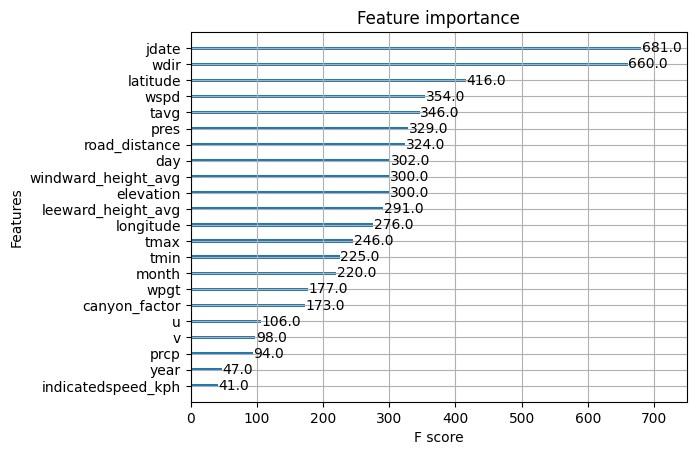

In [13]:
## plot feature importance 
import matplotlib.pyplot as plt
from xgboost import plot_importance

plot_importance(postprocess_model)


In [14]:
## save model to pickle
import pickle
pickle.dump(postprocess_model, open('xgboost_model.pkl', 'wb'))

In [15]:
## predict with model test
model = pickle.load(open('xgboost_model.pkl', 'rb'))
model.predict(X_test_post)


array([26.401766, 16.351183, 20.180695, ..., 13.431682, 26.138857,
       18.783804], dtype=float32)

Facebook Prophet Forecasting

In [16]:
from prophet import Prophet

## create dataframe for prophet
prophet_data = data[['date','no2','site_id']].copy()
prophet_data.rename(columns={"date": "ds", "no2": "y"},inplace=True)

#subset to one site
prophet_data = prophet_data[prophet_data['site_id'] == 'ABD7']


## split data in train and test
train = prophet_data[prophet_data['ds'] < '2022-12-31']
test = prophet_data[prophet_data['ds'] >= '2023-01-01']

## train model
model = Prophet()
model.fit(train)

## predict
future = model.make_future_dataframe(periods=len(test))
forecast = model.predict(future)




14:14:43 - cmdstanpy - INFO - Chain [1] start processing
14:14:43 - cmdstanpy - INFO - Chain [1] done processing


/opt/conda/envs/masters/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/conda/envs/masters/lib/python3.10/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',
/opt/conda/envs/masters/lib/python3.10/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To ret

  0%|          | 0/1 [00:00<?, ?it/s]

14:23:54 - cmdstanpy - INFO - Chain [1] start processing
14:23:54 - cmdstanpy - INFO - Chain [1] done processing


,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,72 days,119.701550,10.940820,9.495006,0.517896,0.317237,0.396270,0.819444
1,73 days,120.477546,10.976226,9.579031,0.520480,0.317237,0.399388,0.819444
2,74 days,116.906575,10.812334,9.408335,0.499129,0.317237,0.390181,0.833333
3,75 days,116.073679,10.773750,9.349712,0.492217,0.308326,0.385822,0.833333
4,76 days,115.046877,10.725991,9.281737,0.490871,0.297341,0.382815,0.833333


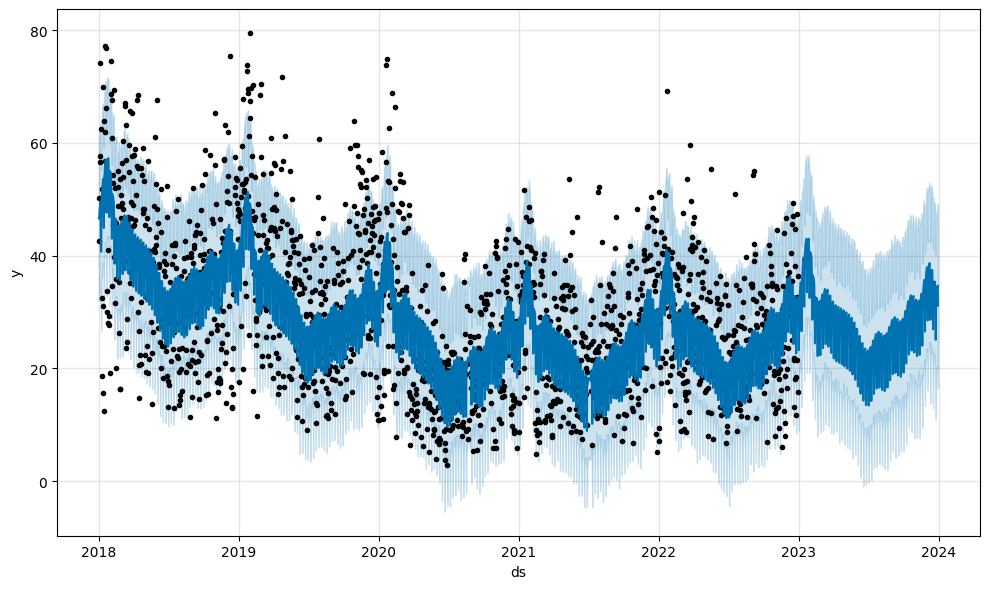

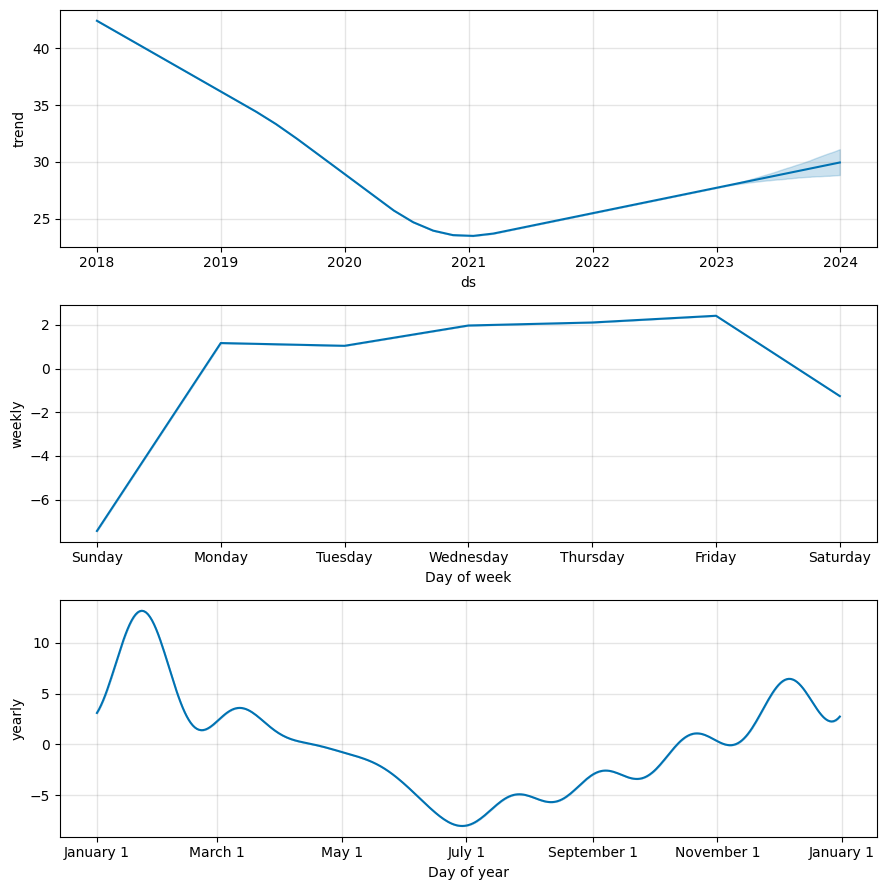

In [25]:
## match the forecast with the test data
merged_results = forecast.merge(test[['ds','y']],on='ds')
merged_results.dropna(inplace=True)

## plot
model.plot(forecast)

## plot components
model.plot_components(forecast)

from prophet.diagnostics import cross_validation
df_cv = cross_validation(model, initial='1080 days', period='180 days', horizon = '730 days')
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

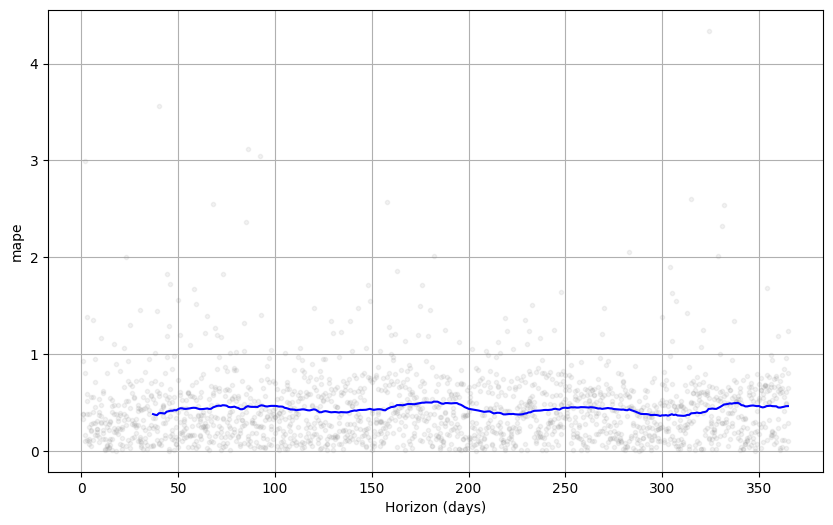

In [37]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')
